<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/BikeDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library



In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and Validate Data

In [80]:
import chardet

# Read the raw bytes from the file
with open('SeoulBikeData.csv', 'rb') as f:
    raw_data = f.read()

# Detect the encoding
result = chardet.detect(raw_data)
encoding = result['encoding']


In [81]:
df=pd.read_csv('SeoulBikeData.csv',encoding=encoding)

In [82]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

- No Null value
- 1 date and 3 categorical variable

In [84]:
# convert date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].dtype

dtype('<M8[ns]')

# Feature Engineering
- Create new features based on existing features to get more insightful features

In [85]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()
df['Weekend'] = df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

- Drop redundant features
- drop date as no more required

In [86]:

df.drop('Date',axis=1,inplace=True)

# target variable and features

In [87]:
y=df['Rented Bike Count']
X = df.drop(columns=['Rented Bike Count'])


## Inspecting Variables

In [88]:
# separate numerical and categorical data
cat_col=df.select_dtypes(include=['object']).columns.tolist()
num_col=df.select_dtypes(include=['float64','int64']).columns.tolist()
cont_features= ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

print(cat_col)
print(num_col)

['Seasons', 'Holiday', 'Functioning Day', 'day']
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend']


In [89]:
df[num_col].describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.284932
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.451408
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000


In [90]:
# Check for data inconsistencies

for column in cat_col:
    print(f"unique values of {column}: {df[column].unique()}")

unique values of Seasons: ['Winter' 'Spring' 'Summer' 'Autumn']
unique values of Holiday: ['No Holiday' 'Holiday']
unique values of Functioning Day: ['Yes' 'No']
unique values of day: ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


# EDA

## Univariate Analysis

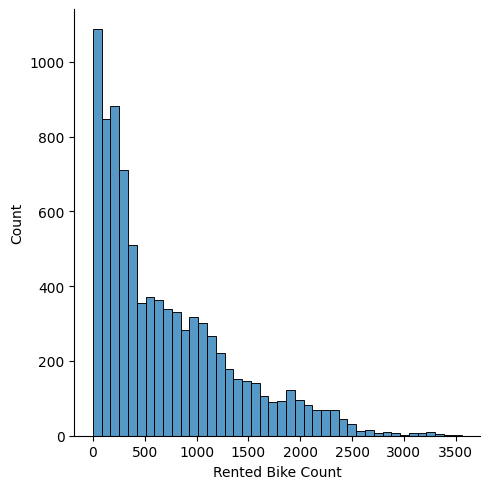

In [91]:
### Distribution of Target Variable
sns.displot(x=df['Rented Bike Count'])

Here distribution of the 'Rented Bike Count' feature is positively skewed  and it can have implications for certain statistical analyses and machine learning algorithms because of underlying assumptions of normality. We need to consider applying transformations to make the distribution more symmetrical.

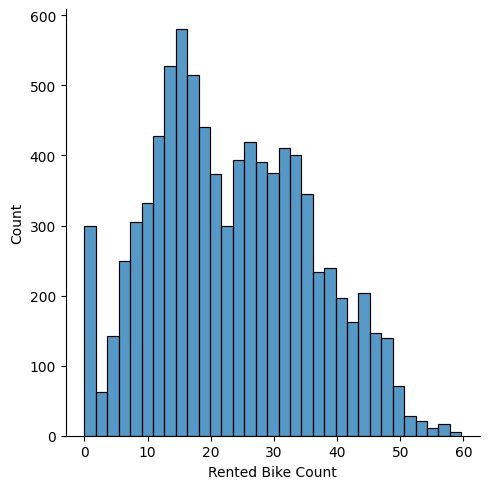

In [92]:
# view with different transformations
sqrt_rentedbike_cnt=np.sqrt(df["Rented Bike Count"])
sns.displot(np.sqrt(df["Rented Bike Count"]))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


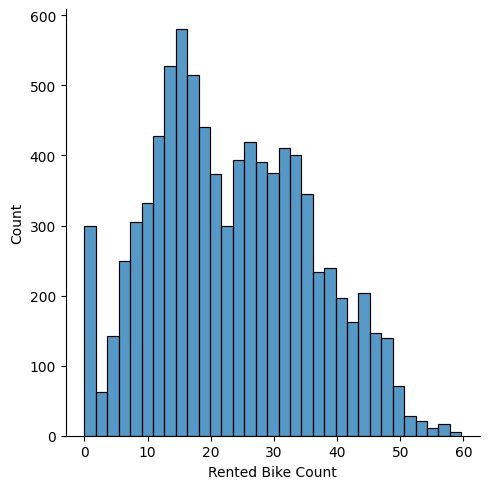

In [93]:
log_rentedbike_cnt=np.log(df["Rented Bike Count"])
sns.displot(np.sqrt(df["Rented Bike Count"]))

<Axes: xlabel='Rented Bike Count'>

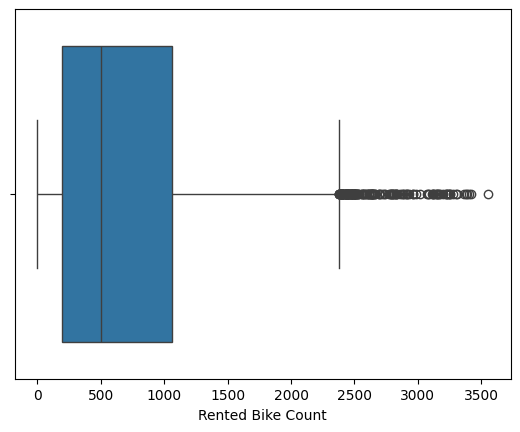

In [94]:
## Outlier Detection
sns.boxplot(x=df["Rented Bike Count"])

In [95]:
#Check skewness of each variable
df[cont_features].skew().sort_values()

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Bivariate Analysis

In [96]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='month', ylabel='Rented Bike Count'>

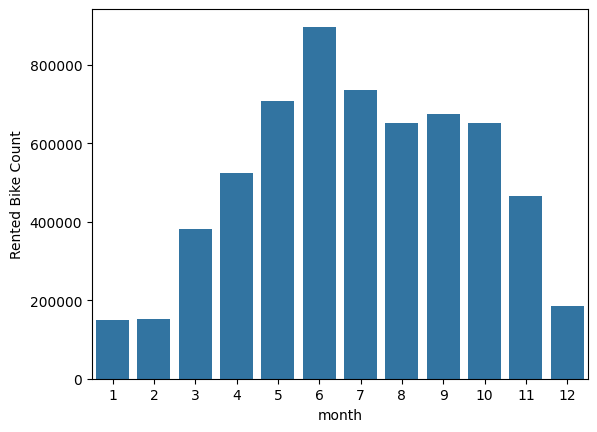

In [97]:
# Bike count analysis by month
Month=df.groupby('month').sum()['Rented Bike Count'].to_frame()
sns.barplot(x='month',y='Rented Bike Count',data=Month)


Rented Bike Count is maximum from increases from May to June where is peak and starts decreasing July Onlwards

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

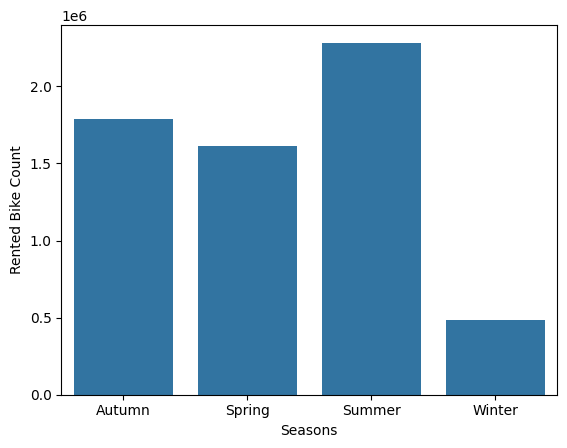

In [98]:
## Seasonal Analysis
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
Season=df.groupby('Seasons').sum()['Rented Bike Count'].to_frame()
sns.barplot(x='Seasons',y='Rented Bike Count',data=Season)

Summer month has maximum Rented Bike Count

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

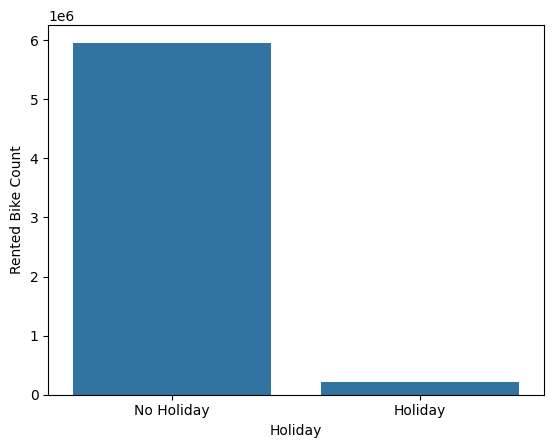

In [99]:
Holiday=df.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()
sns.barplot(x="Holiday",y="Rented Bike Count",data=Holiday)

During a holiday Rented Bike Count is minimum

<Axes: xlabel='Weekend', ylabel='Rented Bike Count'>

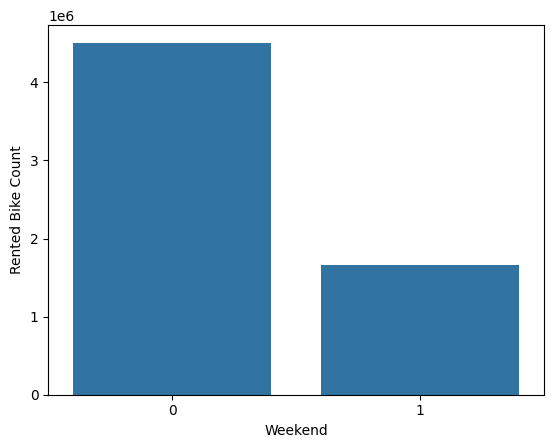

In [100]:
# Group by Weekday and Weekend
Weekend=df.groupby('Weekend').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()
sns.barplot(x="Weekend",y="Rented Bike Count",data=Weekend)

High difference in Rented Bike Count .During weekdays Rented Bike Count is high

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

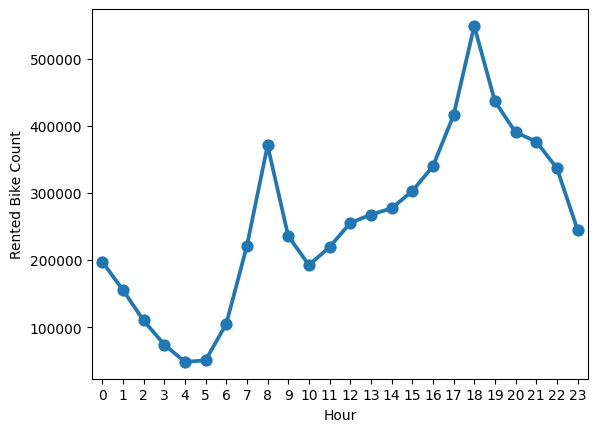

In [101]:
Hour=df.groupby('Hour').sum()['Rented Bike Count'].to_frame()
sns.pointplot(x='Hour',y='Rented Bike Count',data=Hour)

Rented Bike count increases in morning after 5 am (minimum) and is at peak at 8 am in the morning where it reaches local minimum at 10 am .Again the peak is reached at 5 pm in evening .Also 4 pm till 7 pm are high deman hours

4


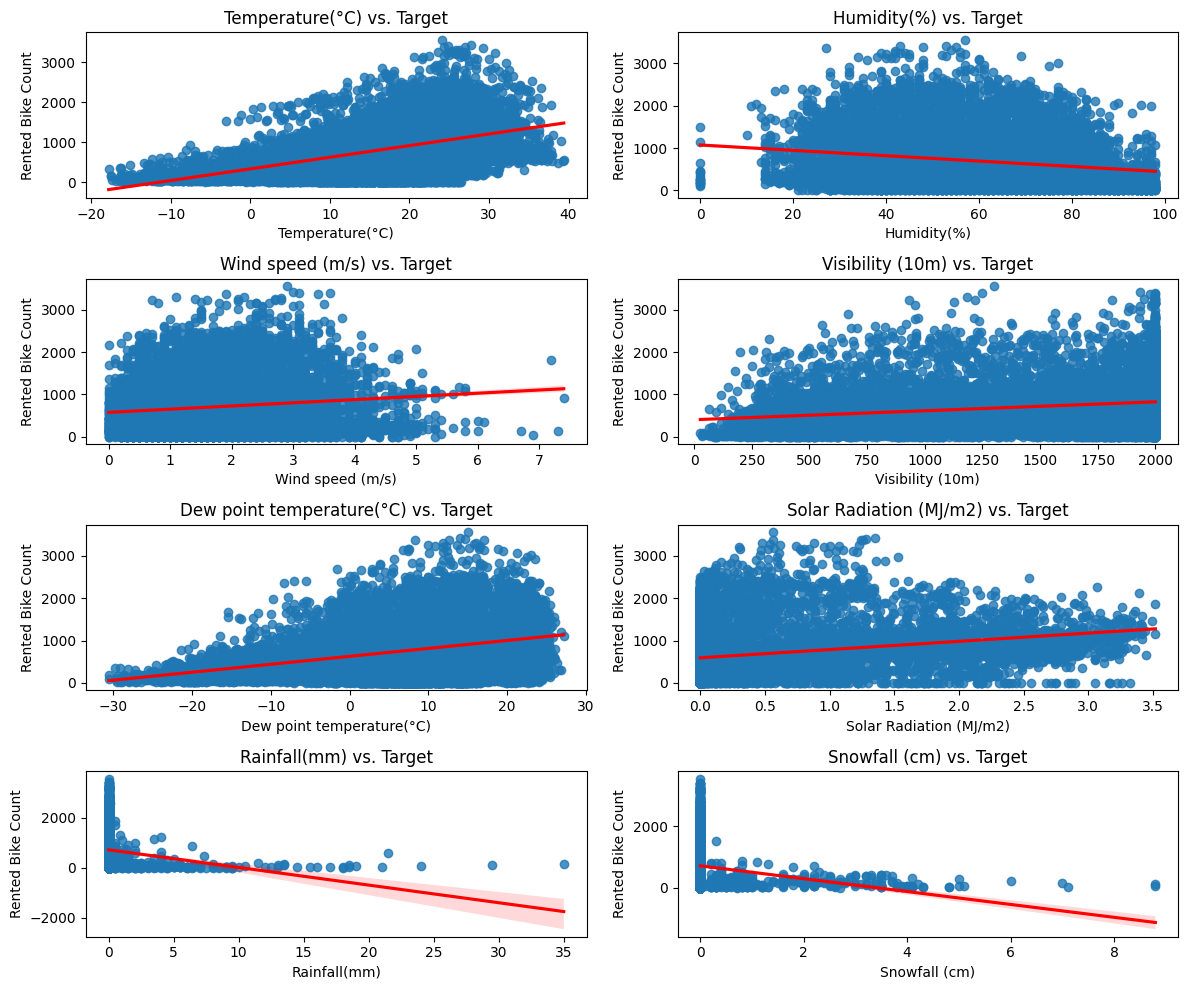

In [102]:
# relation of target variable with contnuous features
num_plots=len(cont_features)
num_cols=2
num_rows=num_plots//num_cols
print(num_rows)

# create subplot grid
fig,axes=plt.subplots(num_rows,num_cols,figsize=(12,10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each continuous variable and create a subplot
for i, var in enumerate(cont_features):
    # Scatter plot of the continuous variable against the target variable
    sns.regplot(x=df[var], y=y, ax=axes[i], line_kws={"color": "red"},data=df)
    axes[i].set_title(f'{var} vs. Target')


plt.tight_layout()


## Multivariate Analysis

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

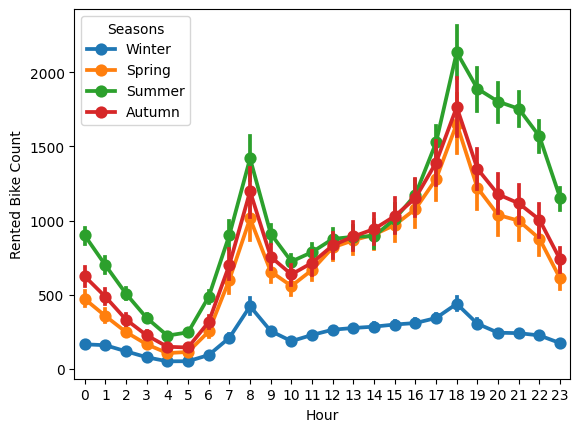

In [103]:
# Season wise Hour Impact on rented Bike Count
sns.pointplot(x='Hour',y=y,hue='Seasons',data=df)

### Check for Multocolinearity

In [104]:
# Calculate the correlation coefficients between each feature and the target variable
corr = df[num_col].corr()["Rented Bike Count"]

# Sort the correlation coefficients in descending order
sorted_corr = corr.sort_values(ascending=False)

print(sorted_corr)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Weekend                     -0.036467
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


In [105]:
corr = df[num_col].corr()
# corr_df = pd.DataFrame({'Correlation': corr})
type(corr_df)


pandas.core.frame.DataFrame

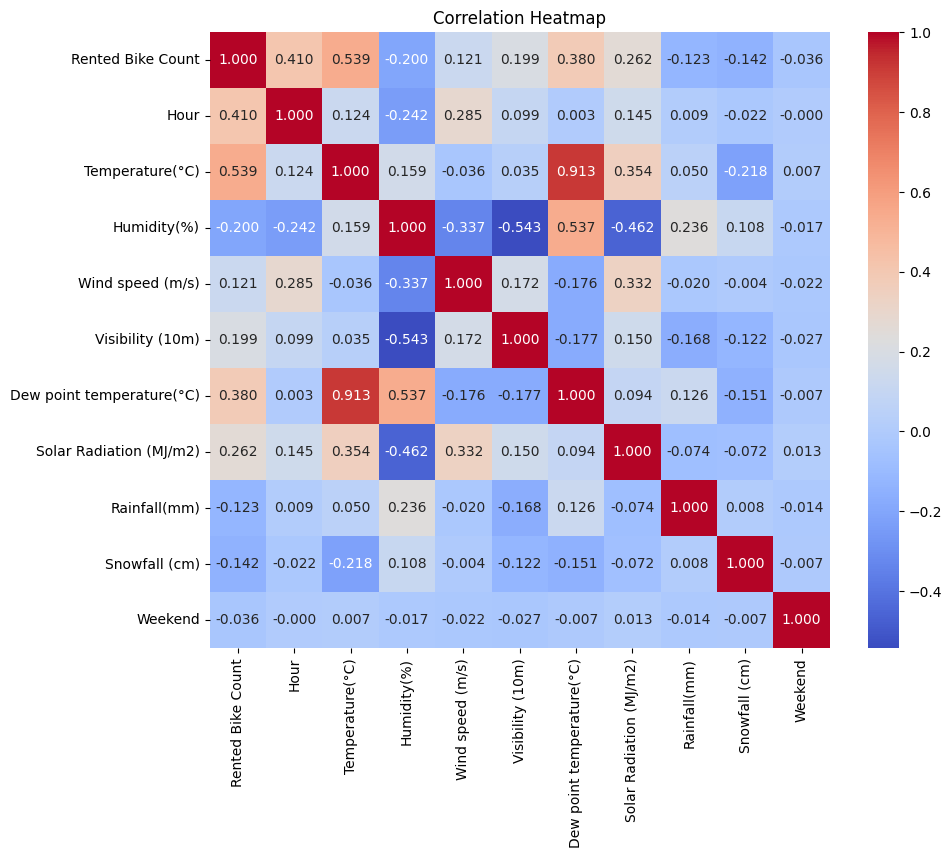

In [106]:
# create heatmap
# Create heatmap
plt.figure(figsize=(10, 8))
# Create heatmap
# plt.figure(figsize=(8, 6))
sns.heatmap(corr.transpose(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

We can remove either of dewpoint temperature and temperature as they are highly correlated.The one which is highly correlated to the target variable is temperature so we will drop dew point temperature

Similary Humidity and Dew Point temparature is highly correlated.We are already dropping Dew Point Temperature

Humidity and Visibility are highly correlated, we can drop either

In [107]:
# Drop Feature/s causing multicolinearity
df.drop("Dew point temperature(°C)",axis=1,inplace=True)
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'month', 'day', 'Weekend'],
      dtype='object')

## Encoding Categorical Data

In [108]:
## Encoding Categorical Data
for col in cat_col:

  print(col, df[col].unique())

Seasons ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday ['No Holiday' 'Holiday']
Functioning Day ['Yes' 'No']
day ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [109]:
# binary encoding for functioning day and holiday
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'Holiday':1,'No Holiday':0})


# nominal encoding using get_dummies for seasons and day
df_day = pd.get_dummies(df['day'], prefix='day',drop_first=True)
df_season=pd.get_dummies(df['Seasons'], prefix='season',drop_first=True)

#drop not needed features- seasons and day
df.drop(['day','Seasons'],axis=1,inplace=True)


In [110]:
#concat with newly created features
pd.concat([df,df_season,df_day],axis=1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Weekend,season_Spring,season_Summer,season_Winter,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,False,False,True,False,False,False,False,False,False
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,False,False,True,False,False,False,False,False,False
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,False,False,True,False,False,False,False,False,False
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,False,False,True,False,False,False,False,False,False
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,0,False,False,False,False,False,False,False,False,False
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,0,False,False,False,False,False,False,False,False,False
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,0,False,False,False,False,False,False,False,False,False
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,0,False,False,False,False,False,False,False,False,False
